<function matplotlib.pyplot.show(*args, **kw)>

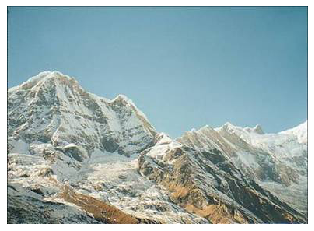

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# np.array([Sxx,Sxy),(Sxy,Syy)])
img_or = cv2.imread('image012.jpg')
img = cv2.cvtColor(img_or, cv2.COLOR_BGR2GRAY)
img_or = cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_or)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

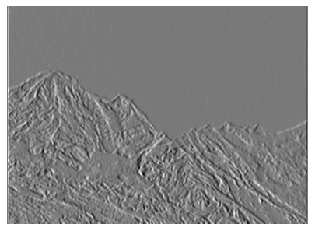

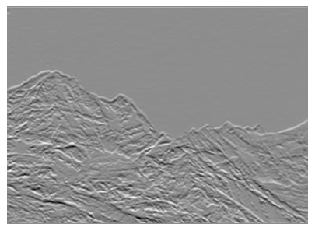

In [87]:
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)

plt.figure()
plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.show

plt.figure()
plt.imshow(sobely, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

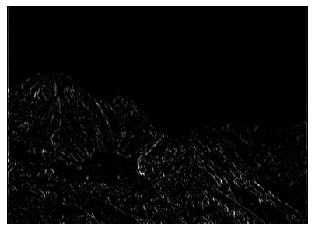

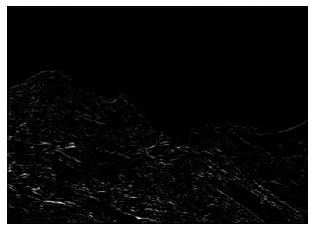

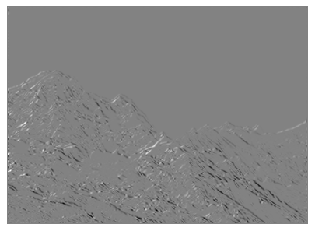

In [88]:
Ixx = np.multiply(sobelx, sobelx)
Iyy = np.multiply(sobely, sobely)
Ixy = np.multiply(sobelx, sobely)

plt.figure()
plt.imshow(Ixx, cmap='gray')
plt.axis('off')
plt.show

plt.figure()
plt.imshow(Iyy, cmap='gray')
plt.axis('off')
plt.show

plt.figure()
plt.imshow(Ixy, cmap='gray')
plt.axis('off')
plt.show

1.3856923158121523e+17


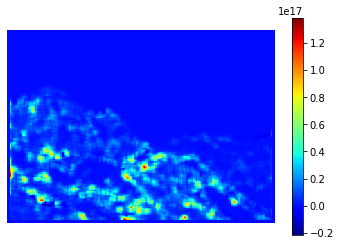

In [89]:
h, w = img.shape

R = np.zeros(img.shape, dtype=np.float)

# print(R.shape)
# print(h, w)
window_size = 9
offset = (window_size-1)/2
for x in range(int(offset), int(w-offset)):
#     print((offset, w-offset))
    for y in range(int(offset), int(h-offset)):
#         Range_xx = Ixx[int(x-offset):int(x+offset+1), int(y-offset):int(y+offset+1)]
#         Range_yy = Iyy[int(x-offset):int(x+offset+1), int(y-offset):int(y+offset+1)]
#         Range_xy = Ixy[int(x-offset):int(x+offset+1), int(y-offset):int(y+offset+1)]
        Range_xx = Ixx[int(y-offset):int(y+offset+1), int(x-offset):int(x+offset+1)]
        Range_yy = Iyy[int(y-offset):int(y+offset+1), int(x-offset):int(x+offset+1)]
        Range_xy = Ixy[int(y-offset):int(y+offset+1), int(x-offset):int(x+offset+1)]
#         print(np.shape(Range_xx))
        
#         print(Range_xy)
        
        Sum_xx = np.sum(Range_xx)
        Sum_yy = np.sum(Range_yy)
        Sum_xy = np.sum(Range_xy)
#         print(Sum_xy)
        arr = np.array([(Sum_xx, Sum_xy),(Sum_xy, Sum_yy)])
        eig = np.linalg.eigvals(arr)
#         print(w)
#         print((y,x))
        power = pow((eig[0]+eig[1]),2)
        R[y,x] = (eig[0]*eig[1])-(0.04*power)
#         print(R)
        

plt.figure()
plt.imshow(R, cmap='jet') #, vmin=R.min(), vmax=R.max()
plt.colorbar()
plt.axis('off')
plt.show

threshold = np.amax(R)
print(threshold)

1.1355356719281024e+17


<function matplotlib.pyplot.show(*args, **kw)>

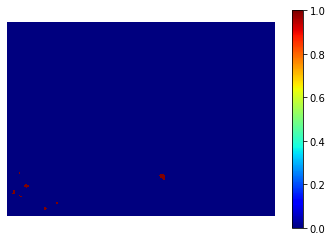

In [84]:
# threshold = input('What would you like as threshold for Harris Corner detection:')
threshold = np.amax(R)*1/2
print(threshold)
# R = [[(R[i,j] = 1.0) if (float(R[i, j])>float(threshold)) else (R[i,j] = 0.0) for j in range(0,w)] for i in range(0,h)]

for i in range(0,h):
    for j in range(0,w):
        if R[i,j]>threshold:
            R[i,j] = 1
        else:
            R[i,j] = 0


# print(R)
# plt.figure()
# plt.imshow(img_or)
# plt.axis('off')
# plt.show
plt.figure()
plt.imshow(R, cmap='jet') #, vmin=R.min(), vmax=R.max()
plt.colorbar()
plt.axis('off')
plt.show

280 386
[[381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 275], [381, 2

<function matplotlib.pyplot.show(*args, **kw)>

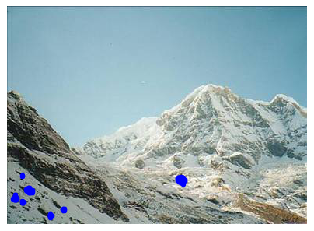

In [85]:
xs = []
ys = []
coor = []
print(h,w)
for i in range(0,h):
    for j in range(0,w):
        if R[i,j] == 1.0:
            xs.append([j])
            ys.append([i])
            coor.append([x,y])

print(coor)
plt.figure()
plt.imshow(img_or)
plt.scatter(x=xs, y=ys, c='b', marker='o', s=20) #, vmin=R.min(), vmax=R.max()
# plt.colorbar()
plt.axis('off')
plt.show